In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)

# Load data

In [2]:
df = pd.read_csv("data/committee.csv")
df.head()

,Mentored Graduation Thesis Title,Student,Mentor,C2,C3,Thesis Application Date,Thesis Status,Mentored Graduation Thesis Desc,Thesis_Desc_EN,Thesis Title EN
0,Паметна мобилна апликација TeamUp,211172 - Теодора Ковачка,Костадин Мишев,Сашо Граматиков,Мила Додевска,23.09.2025,Прифаќање на темата од студентот,Мобилна апликација за креирање и земање дел од...,Mobile application for creation and taking par...,Smart mobile app Teamup
1,Мобилна апликација за гласање на седници,211083 - Викторија Петреска,Петре Ламески,Дејан Спасов,Мила Додевска,23.09.2025,Прифаќање на темата од студентот,Во рамките на оваа дипломска работа ќе биде ди...,"Within this degree work, a software solution w...",Mobile app for sessions voting
2,"Етика во Вештачка интлегенција, балансот помеѓ...",201028 - Климентина Ѓуревска,Игор Мишковски,Сашо Граматиков,Марија Стојчева,22.09.2025,Прифаќање на темата од студентот,Овој дипломски труд има за цел да ја истакне в...,This graduate thesis aims to emphasize the imp...,"Ethics in artificial intration, the balance be..."
3,Имплементација на Python базирана алатка за из...,213296 - Дионис Минев,Дејан Спасов,Весна Димитриевска Ристовска,Петар Секулоски,22.09.2025,Прифаќање на темата од студентот,Оваа дипломска работа презентира развој на соф...,This degree work presents the development of a...,Implementation of Python based tool for extrac...
4,Имплементација на OCPI протоколот како клучен ...,161169 - Костадин Крстев,Костадин Мишев,Сашо Граматиков,Елена Атанасоска,22.09.2025,Одобрение од продекан за настава,Модернизацијата во автомобилската индустрија н...,Modernization in the automotive industry has i...,Implementation of the OCPI Protocol as a key f...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Mentored Graduation Thesis Title  3266 non-null   object
 1   Student                           3266 non-null   object
 2   Mentor                            3266 non-null   object
 3   C2                                3266 non-null   object
 4   C3                                3266 non-null   object
 5   Thesis Application Date           3266 non-null   object
 6   Thesis Status                     3266 non-null   object
 7   Mentored Graduation Thesis Desc   3266 non-null   object
 8   Thesis_Desc_EN                    3266 non-null   object
 9   Thesis Title EN                   3266 non-null   object
dtypes: object(10)
memory usage: 255.3+ KB


# Exploratory Data Analysis

## Thesis status

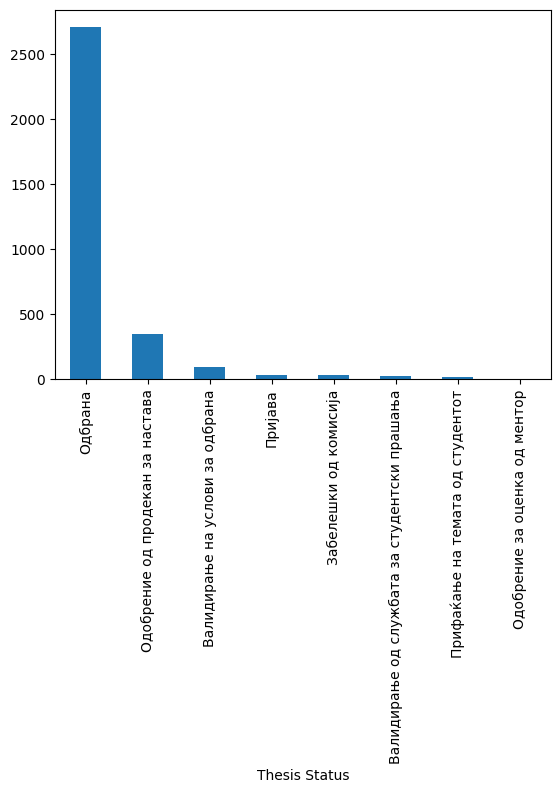

In [4]:
df["Thesis Status"].value_counts().plot.bar()
plt.show()

## Mentor

In [11]:
mentor_counts = df["Mentor"].value_counts().to_frame()
display(mentor_counts.head(10))
display(mentor_counts.tail(10))
display(mentor_counts.describe())

,count
Mentor,
Смилка Јанеска Саркањац,402
Иван Чорбев,278
Димитар Трајанов,253
Иван Китановски,194
Ристе Стојанов,167
Магдалена Костоска,151
Петре Ламески,127
Георгина Мирчева,122
Билјана Стојкоска,88


,count
Mentor,
Сузана Лошковска,10
Александар Стојменски,8
Ласко Баснарков,8
Методија Јанчески,5
Вангел Ајановски,5
Илинка Иваноска,4
Верица Бакева Смиљкова,4
Марија Михова,4
Билјана Тојтовска,2


,count
count,57.000000
mean,57.298246
std,75.137722
min,2.000000
25%,13.000000
50%,30.000000
75%,70.000000
max,402.000000


## Commision members

In [12]:
commision_count = pd.concat([df["C2"], df["C3"]]).value_counts().to_frame()
display(commision_count.head(10))
display(commision_count.tail(10))
display(commision_count.describe())

,count
Ристе Стојанов,329
Александар Тенев,294
Георгина Мирчева,254
Костадин Мишев,242
Владимир Здравески,223
Смилка Јанеска Саркањац,221
Иван Китановски,220
Сашо Граматиков,218
Иван Чорбев,205
Ивица Димитровски,174


,count
Евгенија Крајчевска,1
Катерина Русевска,1
Јозеф Шпилнер,1
Александа Лозаноска,1
Марија Танеска,1
Милка Љончева,1
Славица Тасевска Николовска,1
Филип Блажевски,1
Ѓорѓи Ќосев - 3P Development,1
Благоја Марковски,1


,count
count,114.000000
mean,57.298246
std,72.201651
min,1.000000
25%,5.000000
50%,24.500000
75%,88.000000
max,329.000000


## Mentor - Commission member pairs

In [14]:
mentor_commission_pairs = pd.melt(
    df, id_vars=["Mentor"], value_vars=["C2", "C3"], value_name="Commission Member"
)

mentor_commission_counts = mentor_commission_pairs.groupby(
    ["Mentor", "Commission Member"]
).agg(count=("Commission Member", "count")).groupby(
    level=0, group_keys=False
).apply(lambda x: x.sort_values(ascending=False, by="count"))

mentor_totals = (
    mentor_commission_counts.groupby(level=0).agg(sum=("count", "sum")).sort_values(ascending=False, by="sum")
)
mentor_commission_counts = mentor_commission_counts.reindex(
    mentor_totals.index, level=0
)

mentor_commission_counts=mentor_commission_counts.reset_index()

display(mentor_commission_counts.head(10))
display(mentor_commission_counts.tail(10))

,Mentor,Commission Member,count
0,Смилка Јанеска Саркањац,Александар Тенев,227
1,Смилка Јанеска Саркањац,Георгина Мирчева,170
2,Смилка Јанеска Саркањац,Владимир Здравески,155
3,Смилка Јанеска Саркањац,Весна Димитриевска Ристовска,67
4,Смилка Јанеска Саркањац,Ристе Стојанов,60
5,Смилка Јанеска Саркањац,Билјана Стојкоска,53
6,Смилка Јанеска Саркањац,Дејан Спасов,23
7,Смилка Јанеска Саркањац,Ана Мадевска Богданова,7
8,Смилка Јанеска Саркањац,Ефтим Здравевски,6
9,Смилка Јанеска Саркањац,Катерина Здравкова,5


,Mentor,Commission Member,count
1111,Илинка Иваноска,Билјана Тојтовска,1
1112,Илинка Иваноска,Александра Дединец,1
1113,Илинка Иваноска,Кире Триводалиев,1
1114,Илинка Иваноска,Слободан Калајџиски,1
1115,Билјана Тојтовска,Бојан Илијоски,2
1116,Билјана Тојтовска,Илинка Иваноска,1
1117,Билјана Тојтовска,Катарина Тројачанец,1
1118,Александра Поповска Митровиќ,Верица Бакева Смиљкова,2
1119,Александра Поповска Митровиќ,Весна Димитрова,1
1120,Александра Поповска Митровиќ,Моника Симјаноска,1


### Mentor commission diversity

In [18]:
commission_diversity = mentor_commission_counts.groupby("Mentor").agg(
    commission_diversity=("Commission Member", "count")
).sort_values(ascending=False, by="commission_diversity")

display(commission_diversity.head(10))
display(commission_diversity.tail(10))
display(commission_diversity.describe())

,commission_diversity
Mentor,
Иван Чорбев,53
Петре Ламески,52
Магдалена Костоска,49
Владимир Трајковиќ,46
Катерина Здравкова,40
Игор Мишковски,38
Билјана Стојкоска,37
Ристе Стојанов,36
Иван Китановски,35


,commission_diversity
Mentor,
Александар Стојменски,7
Ласко Баснарков,7
Методија Јанчески,7
Марија Михова,7
Мирослав Мирчев,7
Гоце Арменски,6
Илинка Иваноска,6
Билјана Тојтовска,3
Александра Поповска Митровиќ,3


,commission_diversity
count,57.000000
mean,19.666667
std,12.548952
min,3.000000
25%,10.000000
50%,18.000000
75%,24.000000
max,53.000000


## Triplets (Mentor, Commission member, Commision member)

In [17]:
triplet_counts = df.apply(
    lambda row: (row["Mentor"], *sorted([row["C2"], row["C3"]])), axis=1
)
triplet_counts = triplet_counts.value_counts().to_frame()
display(triplet_counts.head(10))
display(triplet_counts.tail(10))

,count
"(Смилка Јанеска Саркањац, Александар Тенев, Георгина Мирчева)",118
"(Смилка Јанеска Саркањац, Владимир Здравески, Ристе Стојанов)",51
"(Ристе Стојанов, Димитар Трајанов, Костадин Мишев)",47
"(Смилка Јанеска Саркањац, Александар Тенев, Билјана Стојкоска)",39
"(Иван Китановски, Влатко Спасев, Ивица Димитровски)",39
"(Смилка Јанеска Саркањац, Владимир Здравески, Георгина Мирчева)",38
"(Георгина Мирчева, Александар Тенев, Смилка Јанеска Саркањац)",37
"(Владимир Здравески, Георгина Мирчева, Смилка Јанеска Саркањац)",32
"(Смилка Јанеска Саркањац, Весна Димитриевска Ристовска, Владимир Здравески)",30
"(Димитар Трајанов, Костадин Мишев, Сашо Граматиков)",29


,count
"(Билјана Стојкоска, Иван Китановски, Сашо Граматиков)",1
"(Костадин Мишев, Игор Мишковски, Петре Ламески)",1
"(Костадин Мишев, Димитар Пешевски, Ристе Стојанов)",1
"(Иван Чорбев, Бобан Јоксимоски, Мила Додевска)",1
"(Ристе Стојанов, Димитар Трајанов, Елена Атанасоска)",1
"(Ристе Стојанов, Бојана Маројевиќ, Сашо Граматиков)",1
"(Димитар Трајанов, Владимир Трајковиќ, Ристе Стојанов)",1
"(Катерина Здравкова, Иван Чорбев, Ивица Димитровски)",1
"(Катерина Здравкова, Емил Станков, Магдалена Костоска)",1
"(Иван Чорбев, Ѓорѓи Маџаров, Ристе Стојанов)",1
